In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular workspace, you'll practice creating single-variable plots for categorical data.

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

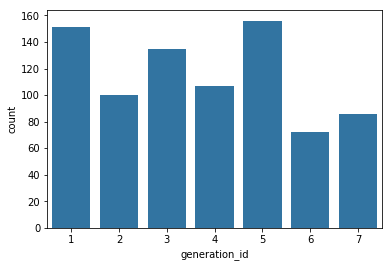

In [5]:
# YOUR CODE HERE
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

Once you've created your chart, run the cell below to check the output from our solution. Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [6]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna() 
#.dropna() drops the rows where valueis Nan
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64
<class 'pandas.core.series.Series'>
Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')
807
131
0.1623296158612144
807
tick_props [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16]
tick_names ['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

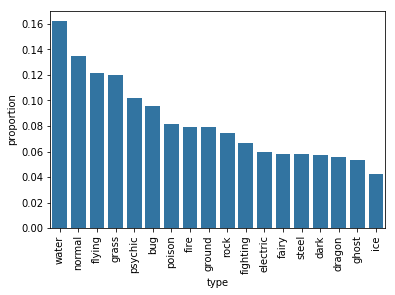

In [16]:
# get proportion taken by most common group for derivation
# of tick marks
type_counts = pkmn_types['type'].value_counts()
print(type_counts)
print(type(type_counts))

type_order = type_counts.index
print(type_order)

#creating proportions
n_pokemon = pokemon.shape[0]
print(n_pokemon)

max_type_count = type_counts[0]
print(max_type_count)

max_prop = max_type_count / n_pokemon
print(max_prop)

n_points = pokemon.shape[0]
print(n_points)

#generating propotion ticks
tick_props = np.arange(0, max_prop, 0.02)
print ('tick_props', tick_props)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print ('tick_names', tick_names)

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, x = 'type', color = base_color, order = type_order);
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xticks(rotation=90)


If you're interested in seeing the code used to generate the solution plots, you can find it in the `solutions_univ.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!

Elements count: 
 water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64
[131 109  98  97  82  77  66  64  64  60  54  48  47  47  46  45  43  34]
order_of_elements:  Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')
max_count:  131
number_of_rows:  807
proportion:  0.1623296158612144
ticks_proportion:  [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16]
tick_names:  ['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

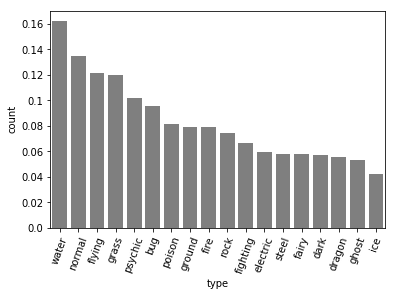

In [34]:
#I'm practicing relative graph

#counting occurence of elements in type column
elements_count = pkmn_types['type'].value_counts()
print("Elements count: \n", elements_count)

#retrieving only values of this elements_count
count_only = elements_count.values
print(count_only)

order_of_elements = elements_count.index
print('order_of_elements: ',order_of_elements)

#creating proportions
max_count = count_only[0]
print('max_count: ',max_count)

number_of_rows = pokemon.shape[0]
print('number_of_rows: ',number_of_rows)

proportion = max_count/number_of_rows
print('proportion: ',proportion)

#generating proportion ticks
ticks_proportion = np.arange(0, proportion, 0.02)
print('ticks_proportion: ',ticks_proportion)

tick_names = ['{:0.2f}'.format(value) for value in ticks_proportion] #here the : is important
print('tick_names: ',tick_names)

#plotting graph
chosen_color = sb.color_palette()[7]
sb.countplot(data = pkmn_types, x = 'type', order = order_of_elements, color = chosen_color)
plt.yticks(ticks_proportion * number_of_rows, ticks_proportion)
plt.xticks(rotation = 70)